In [ ]:
import numpy as np
import pandas as pd

#vizualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  # High resolution
plt.rcParams['savefig.dpi'] = 300  # Even higher for saved figures
plt.rcParams['figure.figsize'] = (10, 6)  # Larger default size

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/heart (1).csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [20]:
df.info()
df.describe().T
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(1025, 14)

In [32]:
#check for invalid rows
invalid_rows = df[
    (df['age'] <= 0) |
    (~df['sex'].isin([0,1])) |
    (~df['cp'].isin([0,1,2,3])) |
    ((df['trestbps'] < 80) | (df['trestbps'] > 200)) |
    (df['chol'] < 100 | (df['chol'] > 600)) |
    (~df['fbs'].isin([0,1])) |
    (~df['restecg'].isin([0,1,2])) |
    (df['thalach'] < 60 | (df['thalach'] > 220 )) |
    (~df['exang'].isin([0,1])) |
    (df['oldpeak']<0)
]

In [9]:
len(invalid_rows)

0

In [14]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [35]:
continuous_features = ['age','trestbps','chol','thalach','oldpeak']

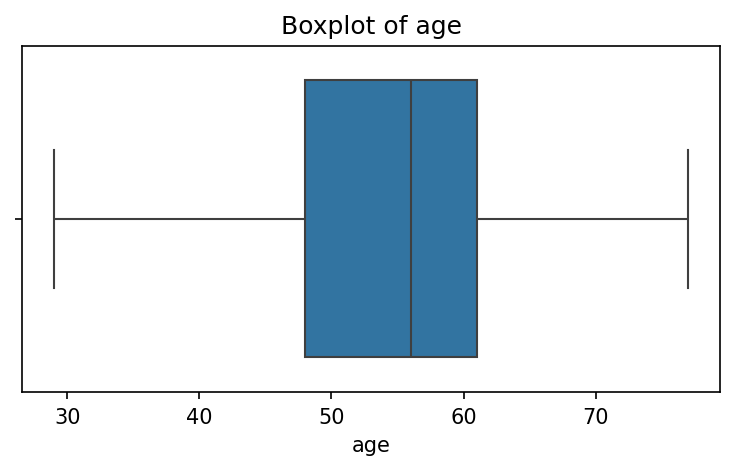

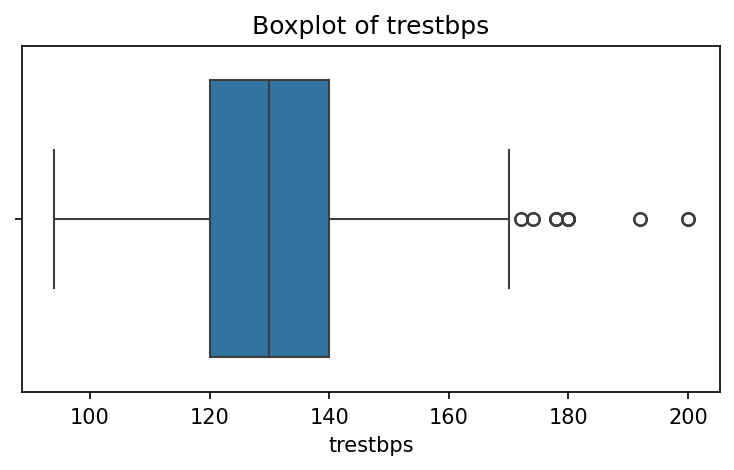

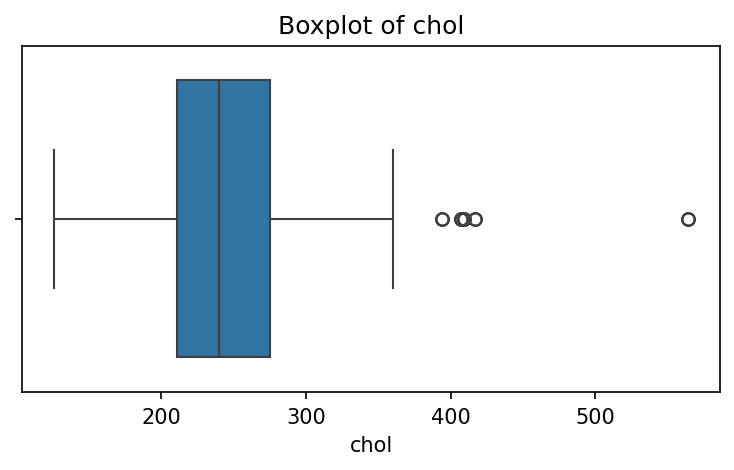

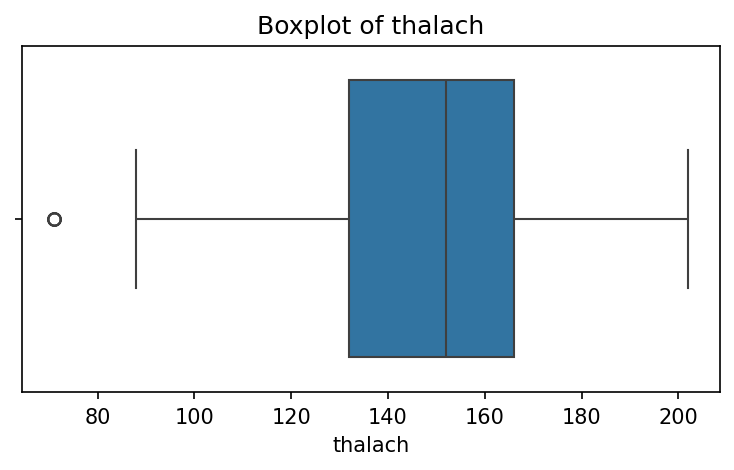

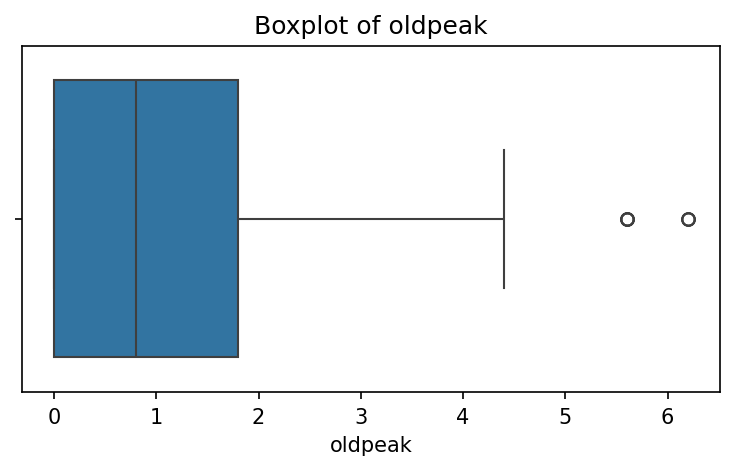

In [33]:
# Correct the feature name 'thalachh' to 'thalach' for this plotting loop
corrected_features = [f if f != 'thalachh' else 'thalach' for f in continuous_features]

for feature in corrected_features:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=df[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show()

**Univariate Analysis on Numerical data**

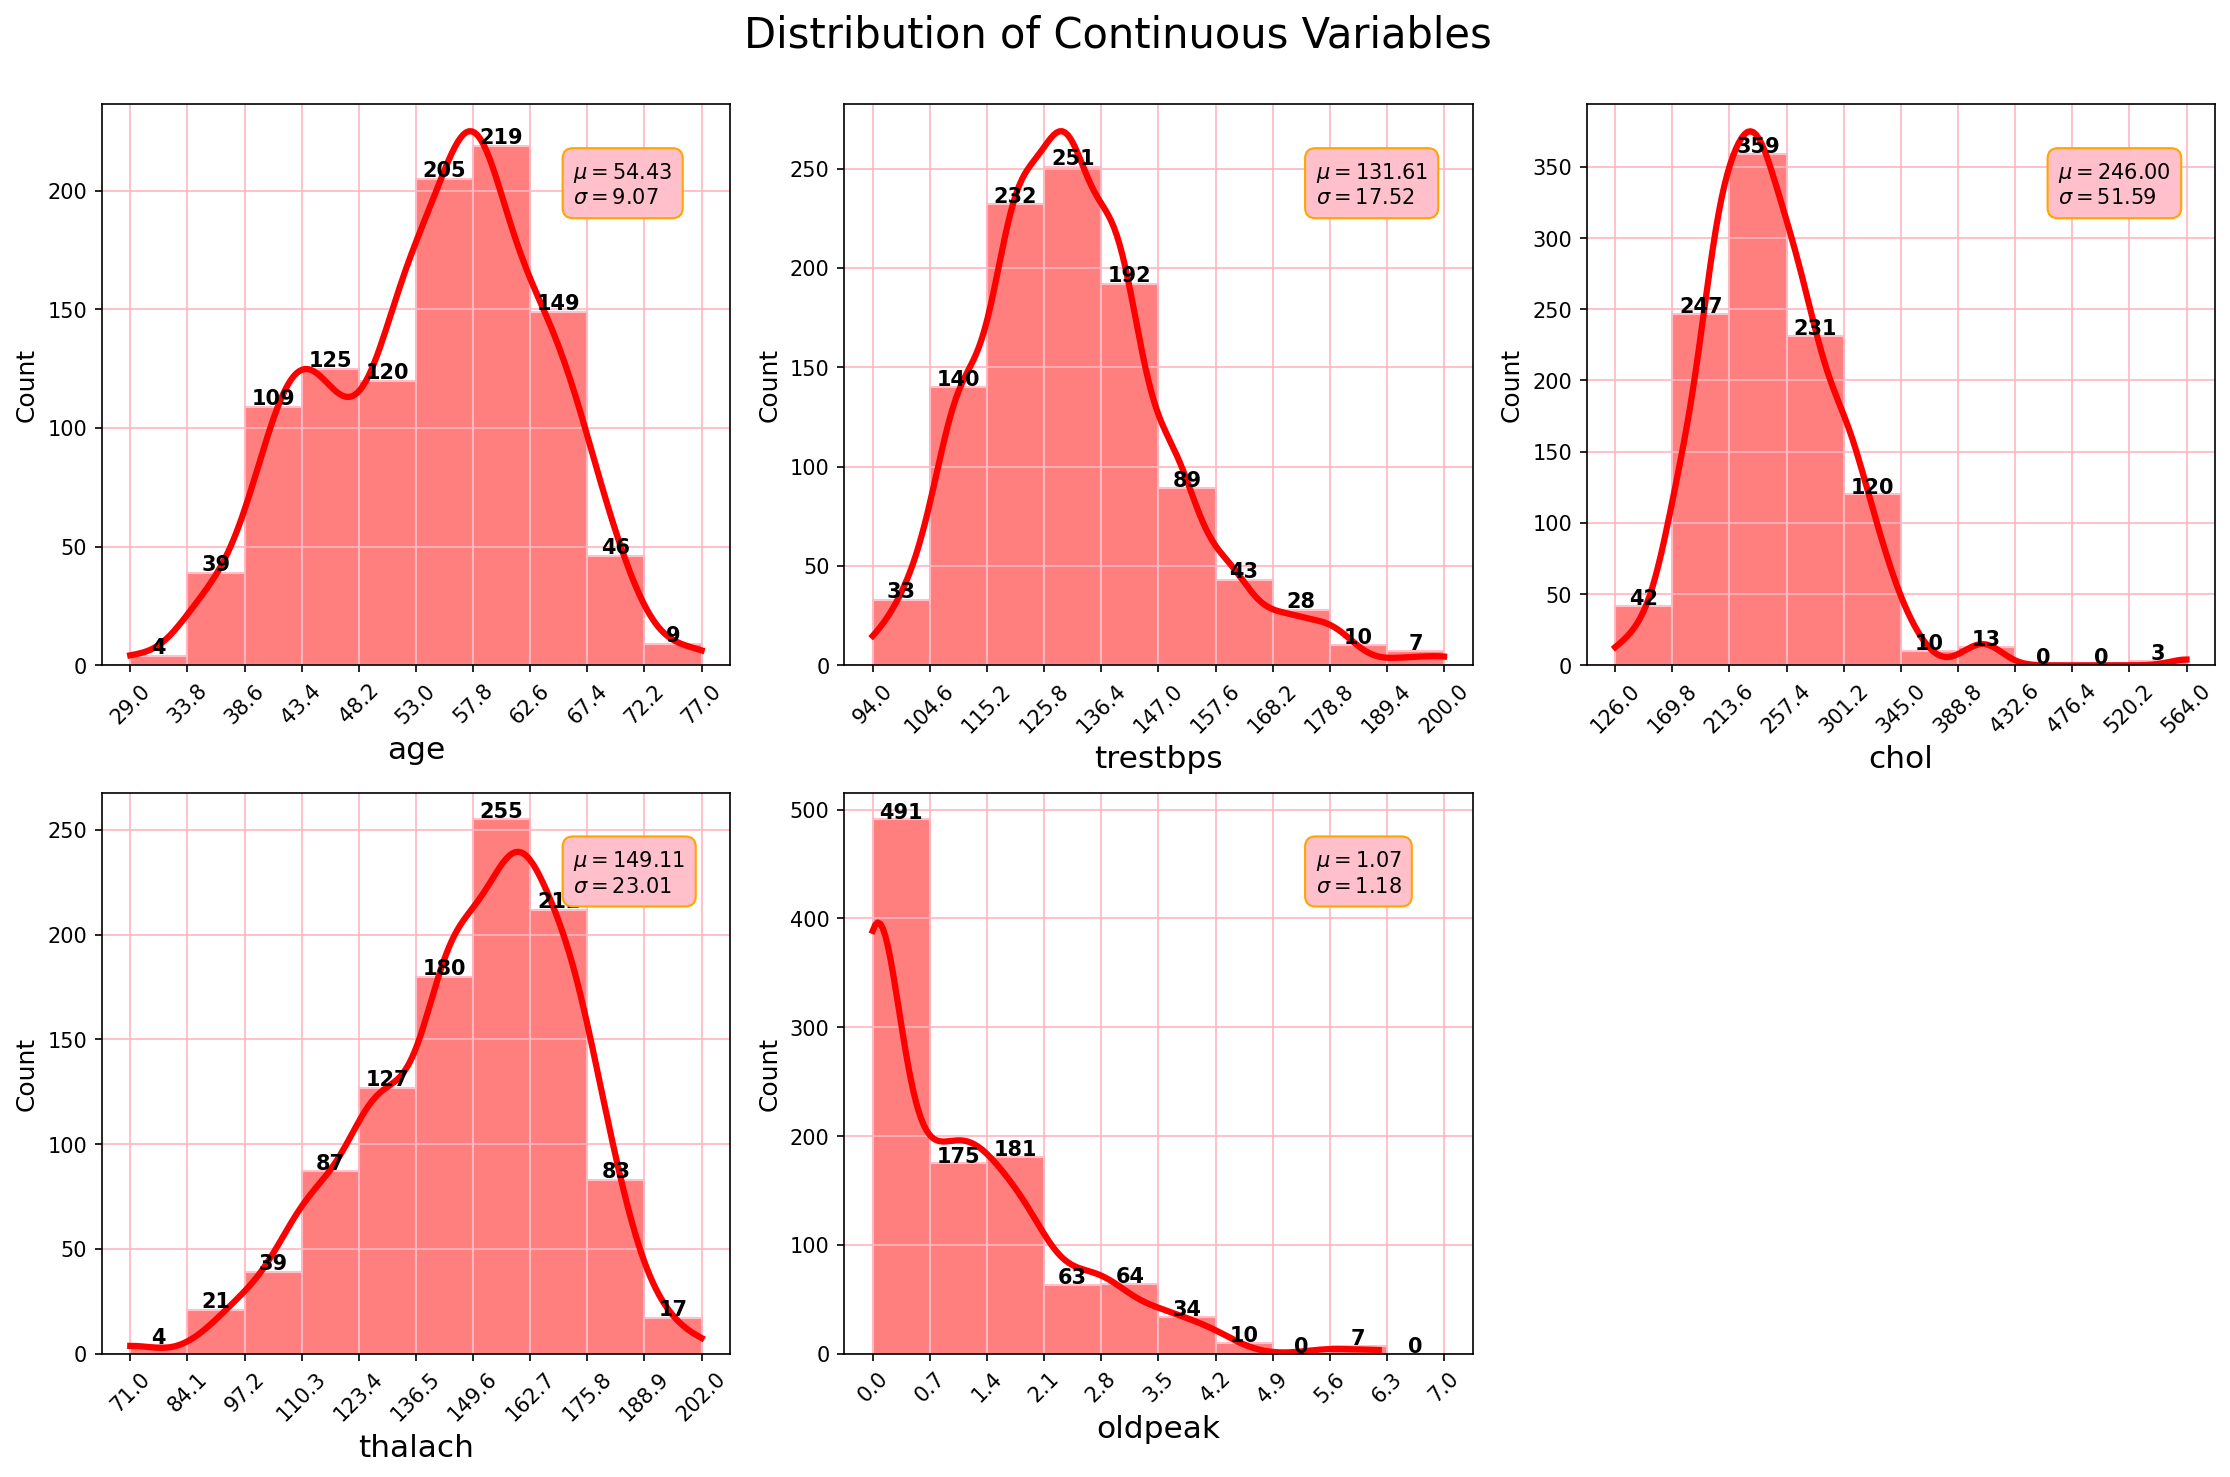

In [36]:
#Numerical data Univariate Analysis

df_continuous = df[continuous_features]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, col in enumerate(df_continuous.columns):
  x = i // 3
  y = i % 3
  values, bin_edges = np.histogram(df_continuous[col], range = (np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

  graph = sns.histplot(data = df_continuous, x = col, bins=bin_edges, kde = True, ax=ax[x,y], edgecolor='pink', color = 'red', alpha=0.5, line_kws = {'lw':3})
  ax[x,y].set_xlabel(col, fontsize=15)
  ax[x,y].set_ylabel('Count', fontsize=12)
  ax[x,y].set_xticks(np.round(bin_edges, 1))
  ax[x,y].set_xticklabels(ax[x,y].get_xticks(), rotation = 45)
  ax[x,y].grid(color = 'lightpink')

  for j, p in enumerate(graph.patches):
    ax[x,y].annotate('{}'.format(p.get_height()),(p.get_x() + p.get_width() / 2, p.get_height()+1),ha='center', fontsize=10,fontweight='bold')

  textstr = '\n'.join((
      r'$\mu = %.2f$'% df_continuous[col].mean(),
      r'$\sigma = %.2f$' % df_continuous[col].std()
  ))

  ax[x,y].text(0.75, 0.9, textstr, transform = ax[x,y].transAxes, fontsize = 10, verticalalignment = 'top', color='black', bbox=dict(boxstyle = 'round', facecolor = 'pink', edgecolor = 'orange', pad = 0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Univariate  Analysis on categorical data**

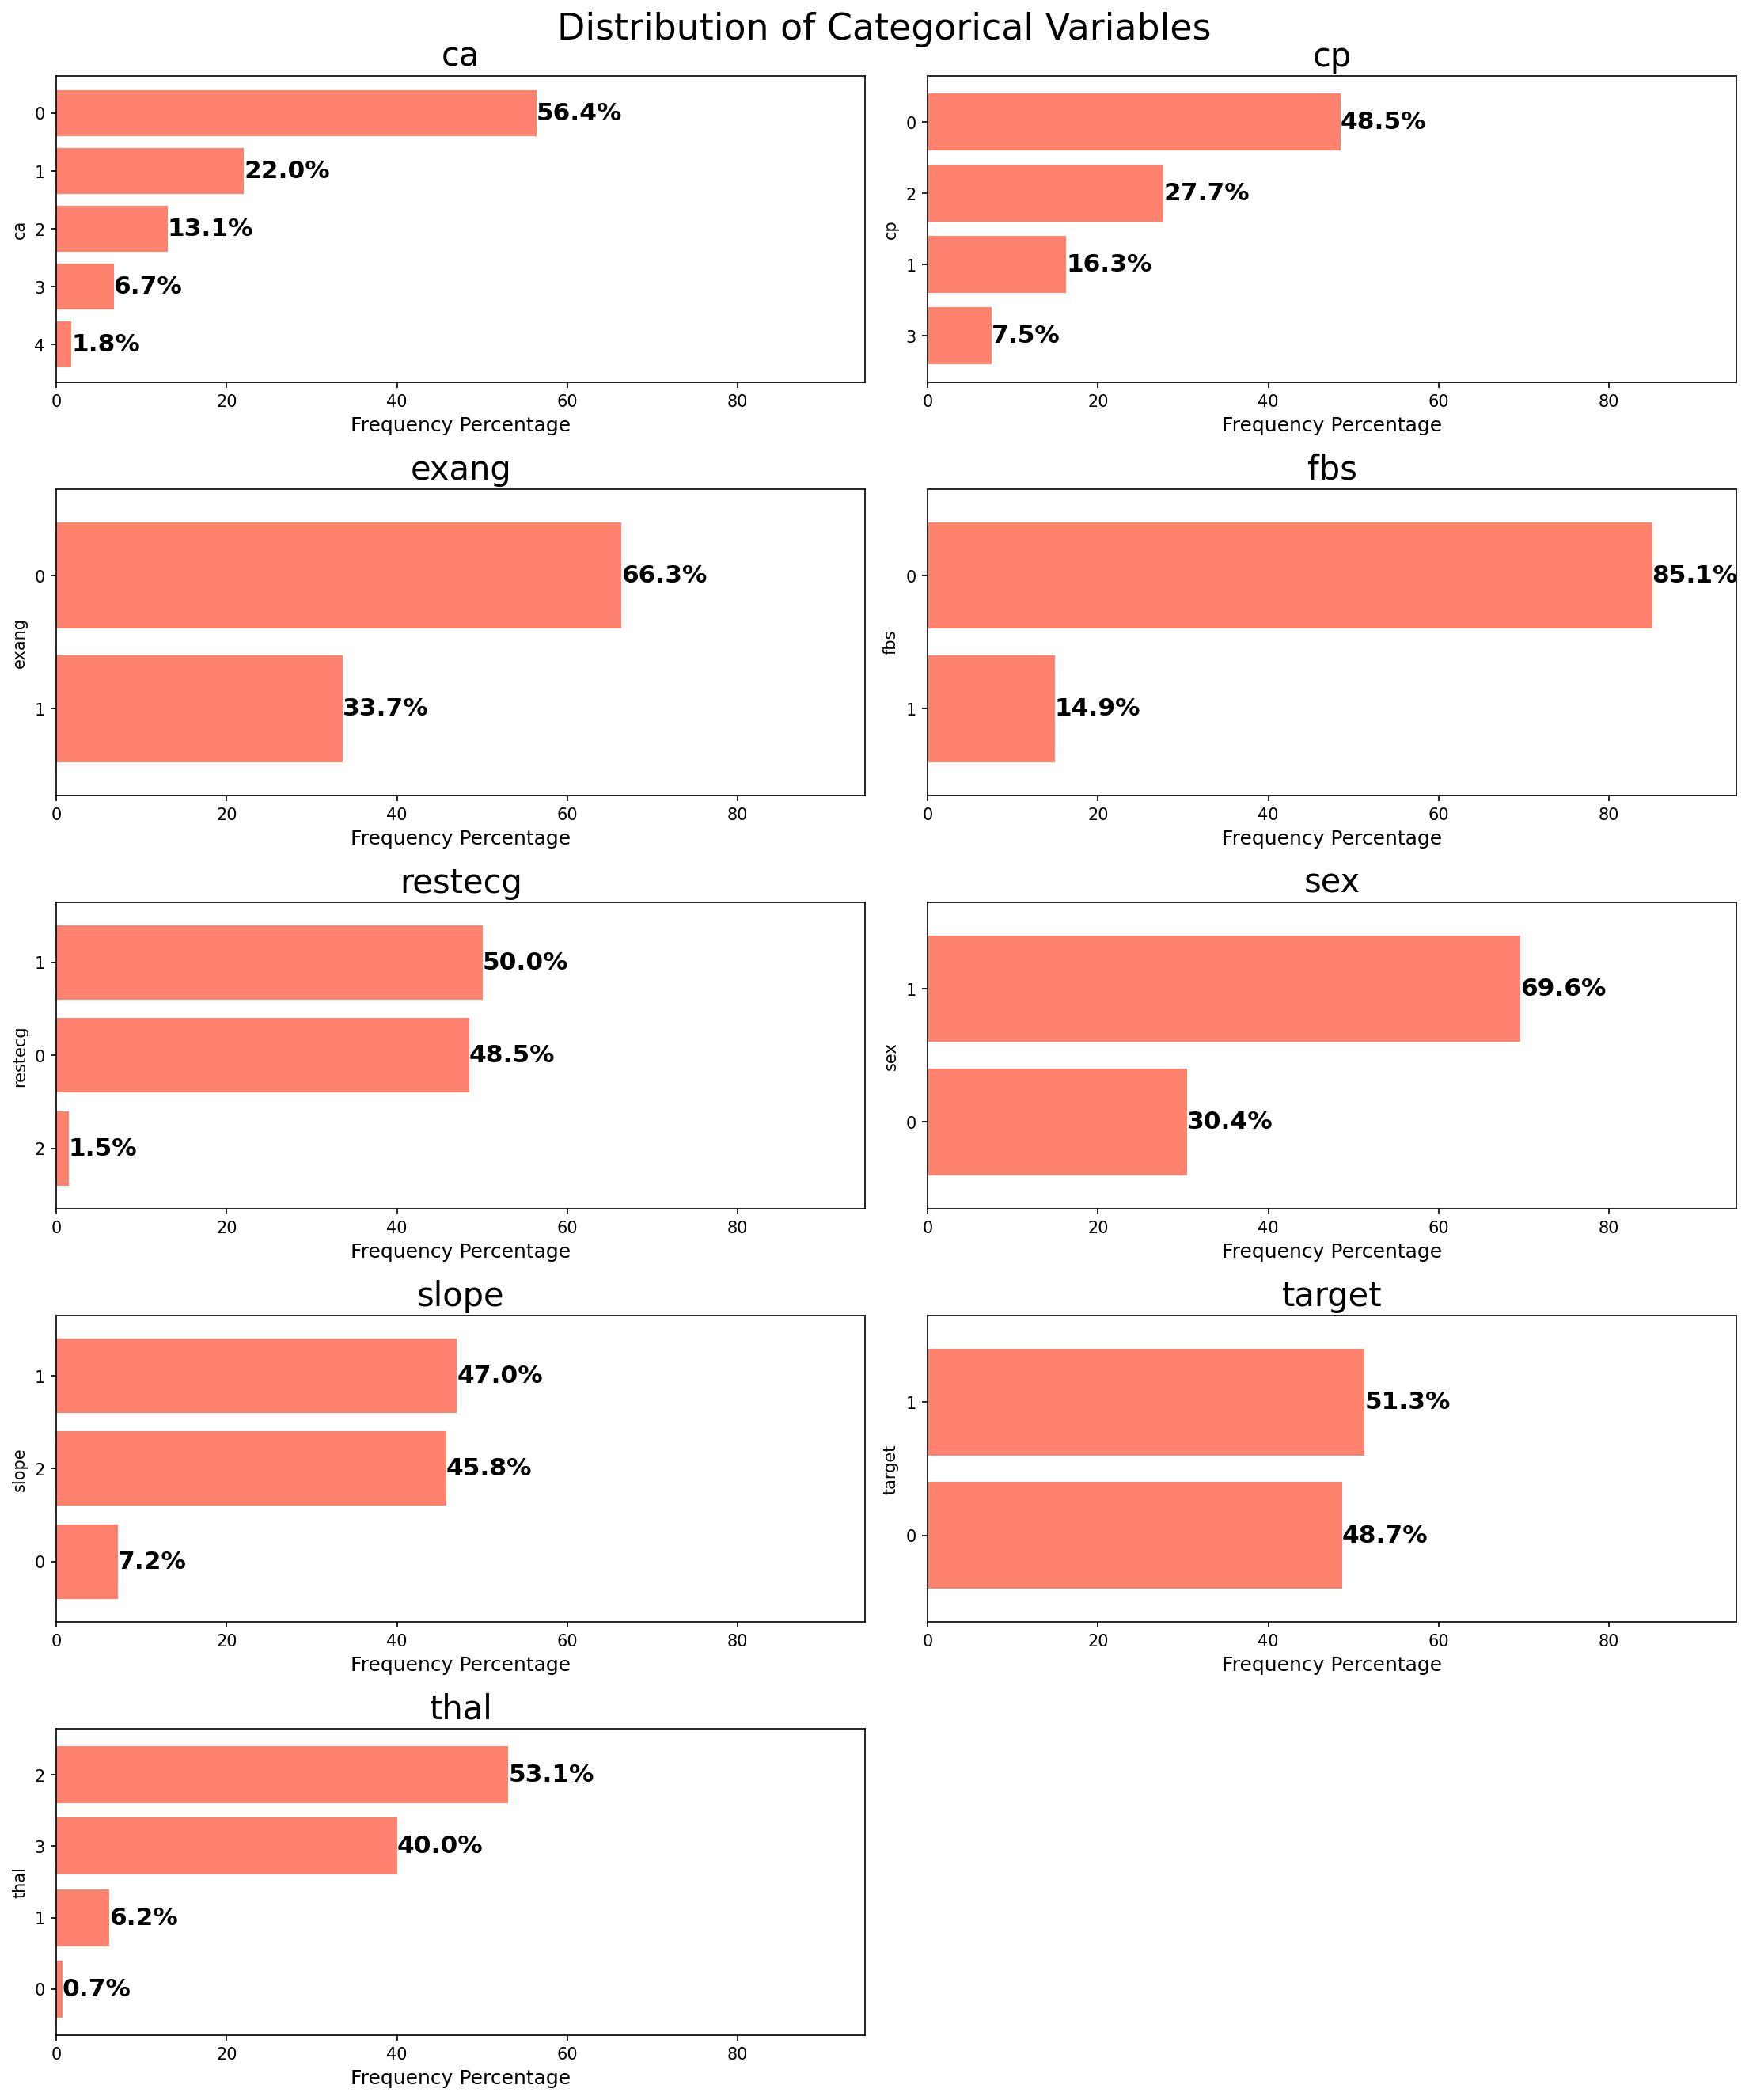

In [38]:
#categorial data Univariate Analysis

categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

for i, col in enumerate(categorical_features):
  row  = i//2
  col_idx = i%2
  #calculate frequency percentage
  value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

  value_counts.plot(kind='barh', ax= ax[row, col_idx], width = 0.8,color = '#ff826e')
  #add frequency percentages to bars

  for index, value in enumerate(value_counts):
    ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize = 15, weight='bold', va='center')
    ax[row, col_idx].set_xlim([0,95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize =12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Bivariate Analysis**

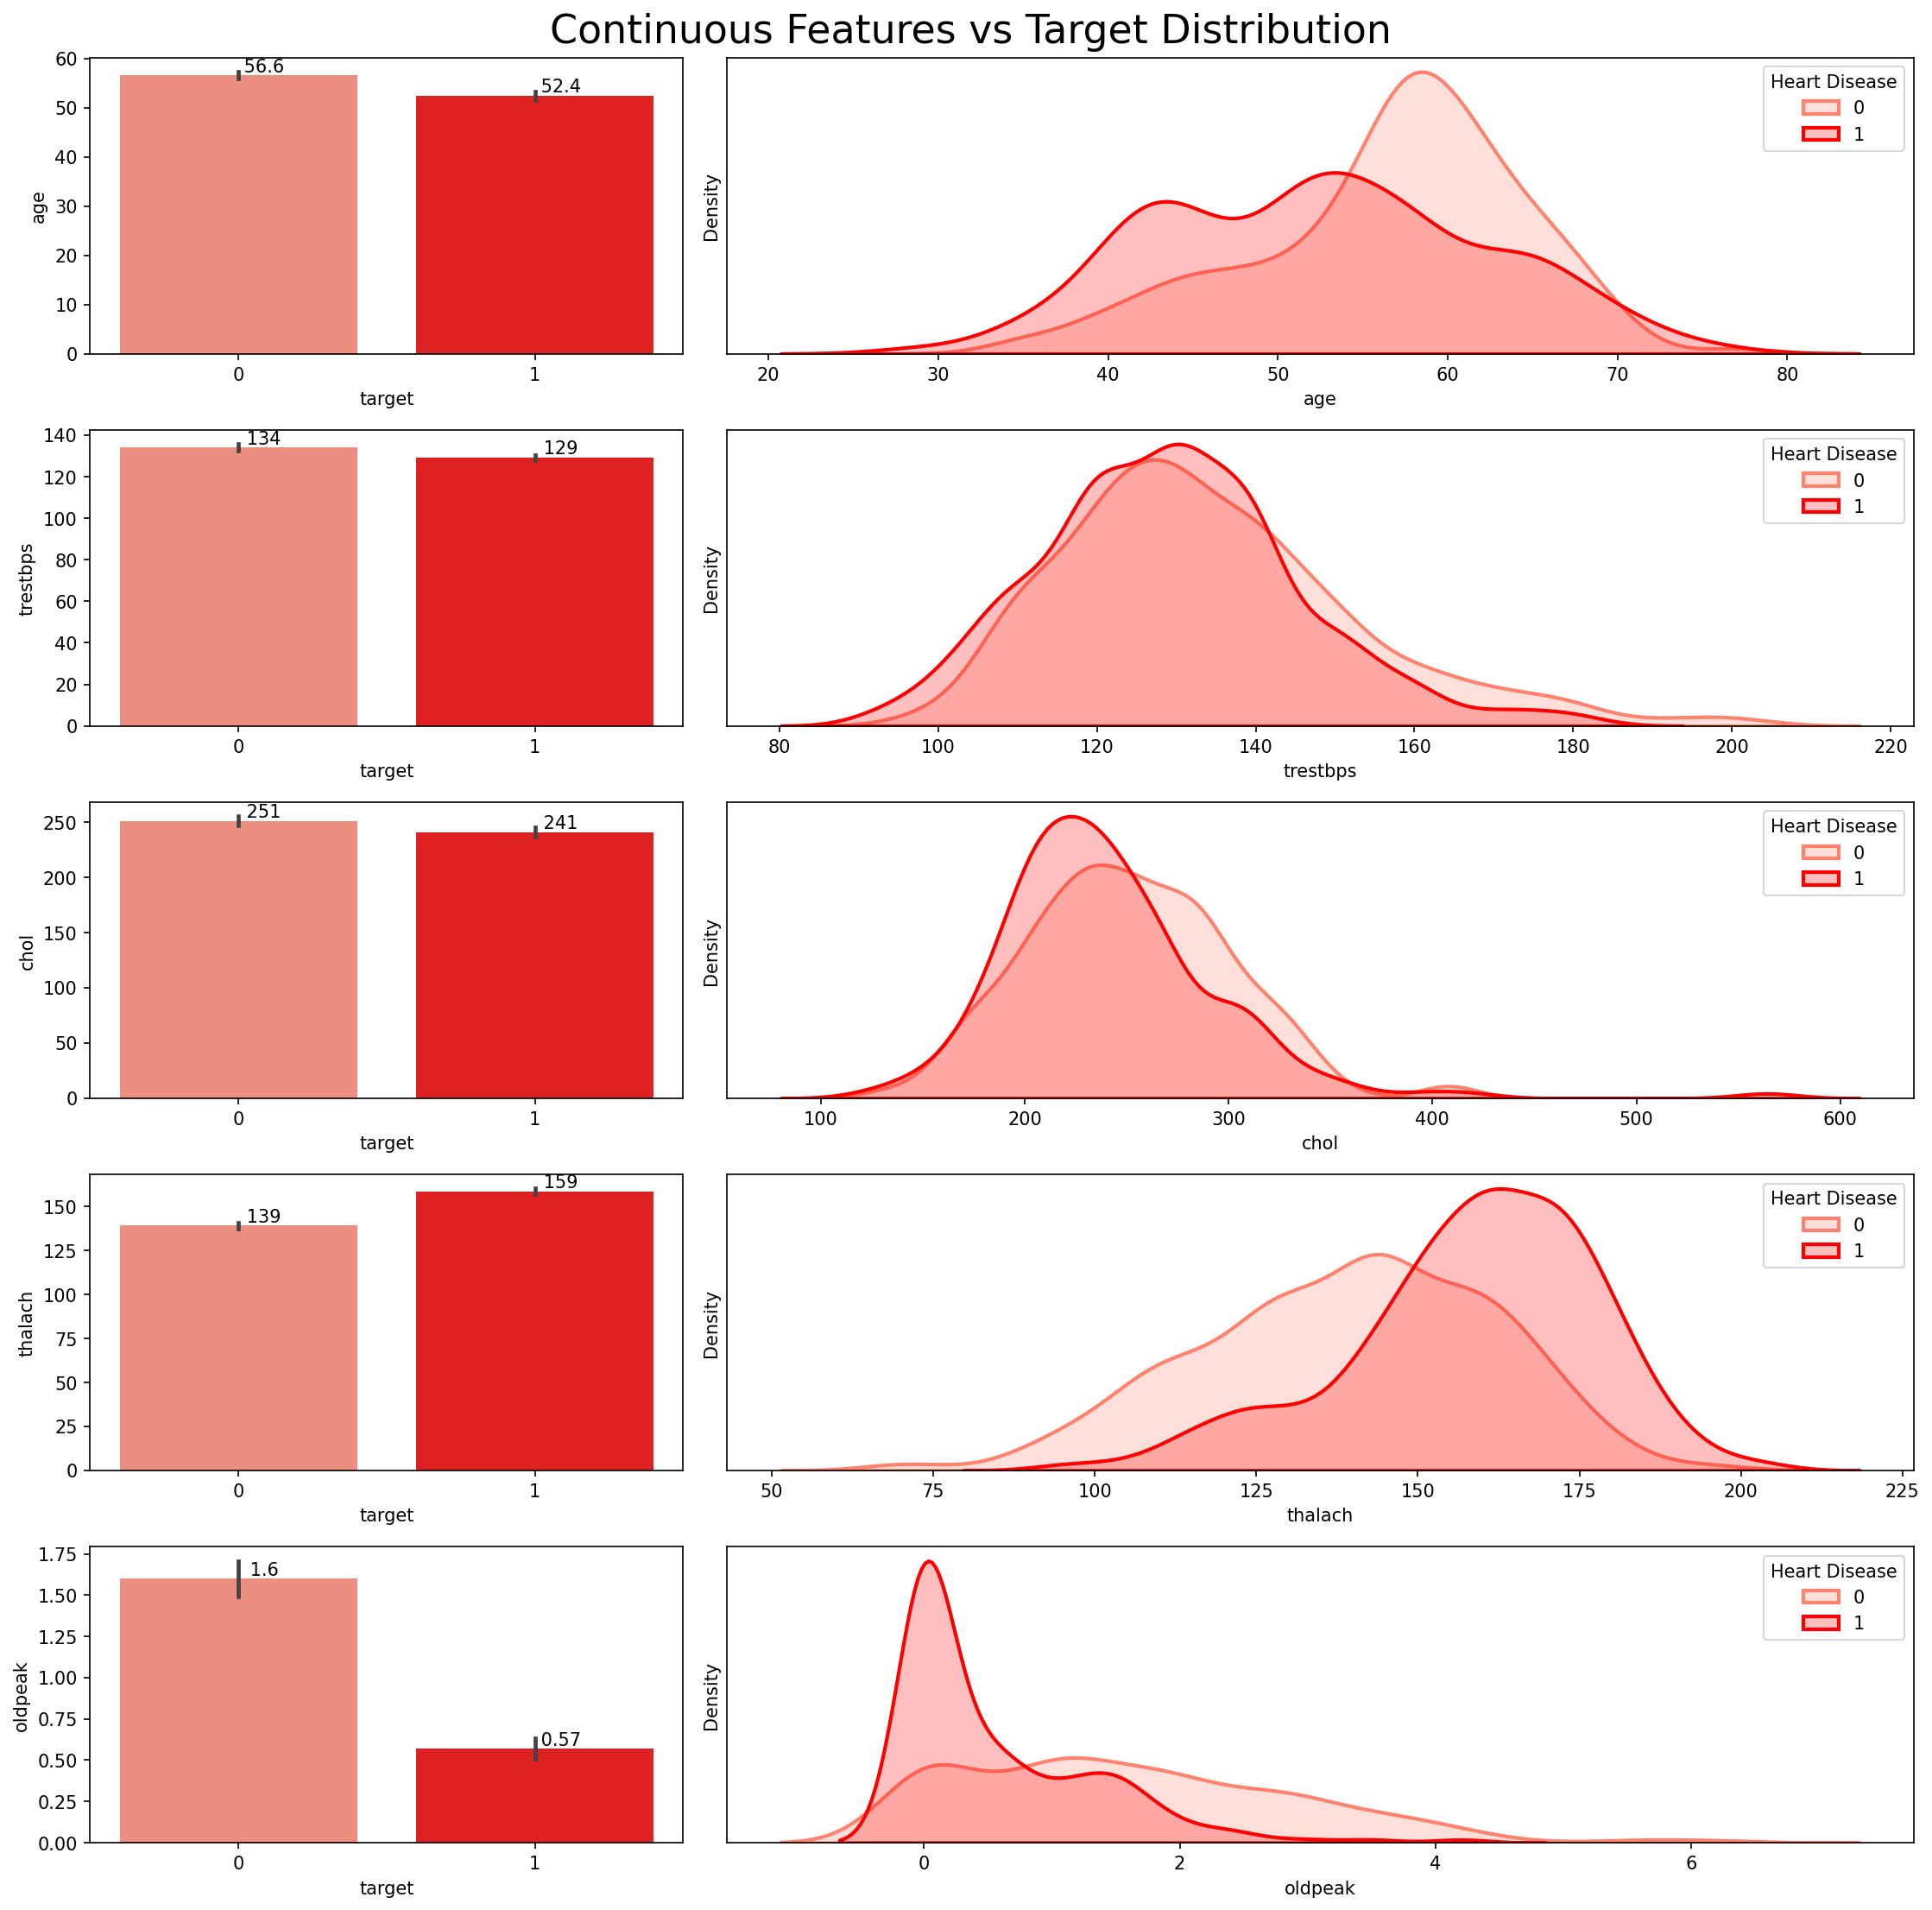

In [39]:
sns.set_palette(['#ff826e', 'red'])

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 2]})
bar_colors = ['#ff826e', 'red'] # Corrected: Removed the empty string

for i, col in enumerate(continuous_features):
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i, 0], palette=bar_colors)
    sns.kdeplot(data=df[df["target"] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='0')
    sns.kdeplot(data=df[df["target"] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='1')
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Heart Disease', loc='upper right')

    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

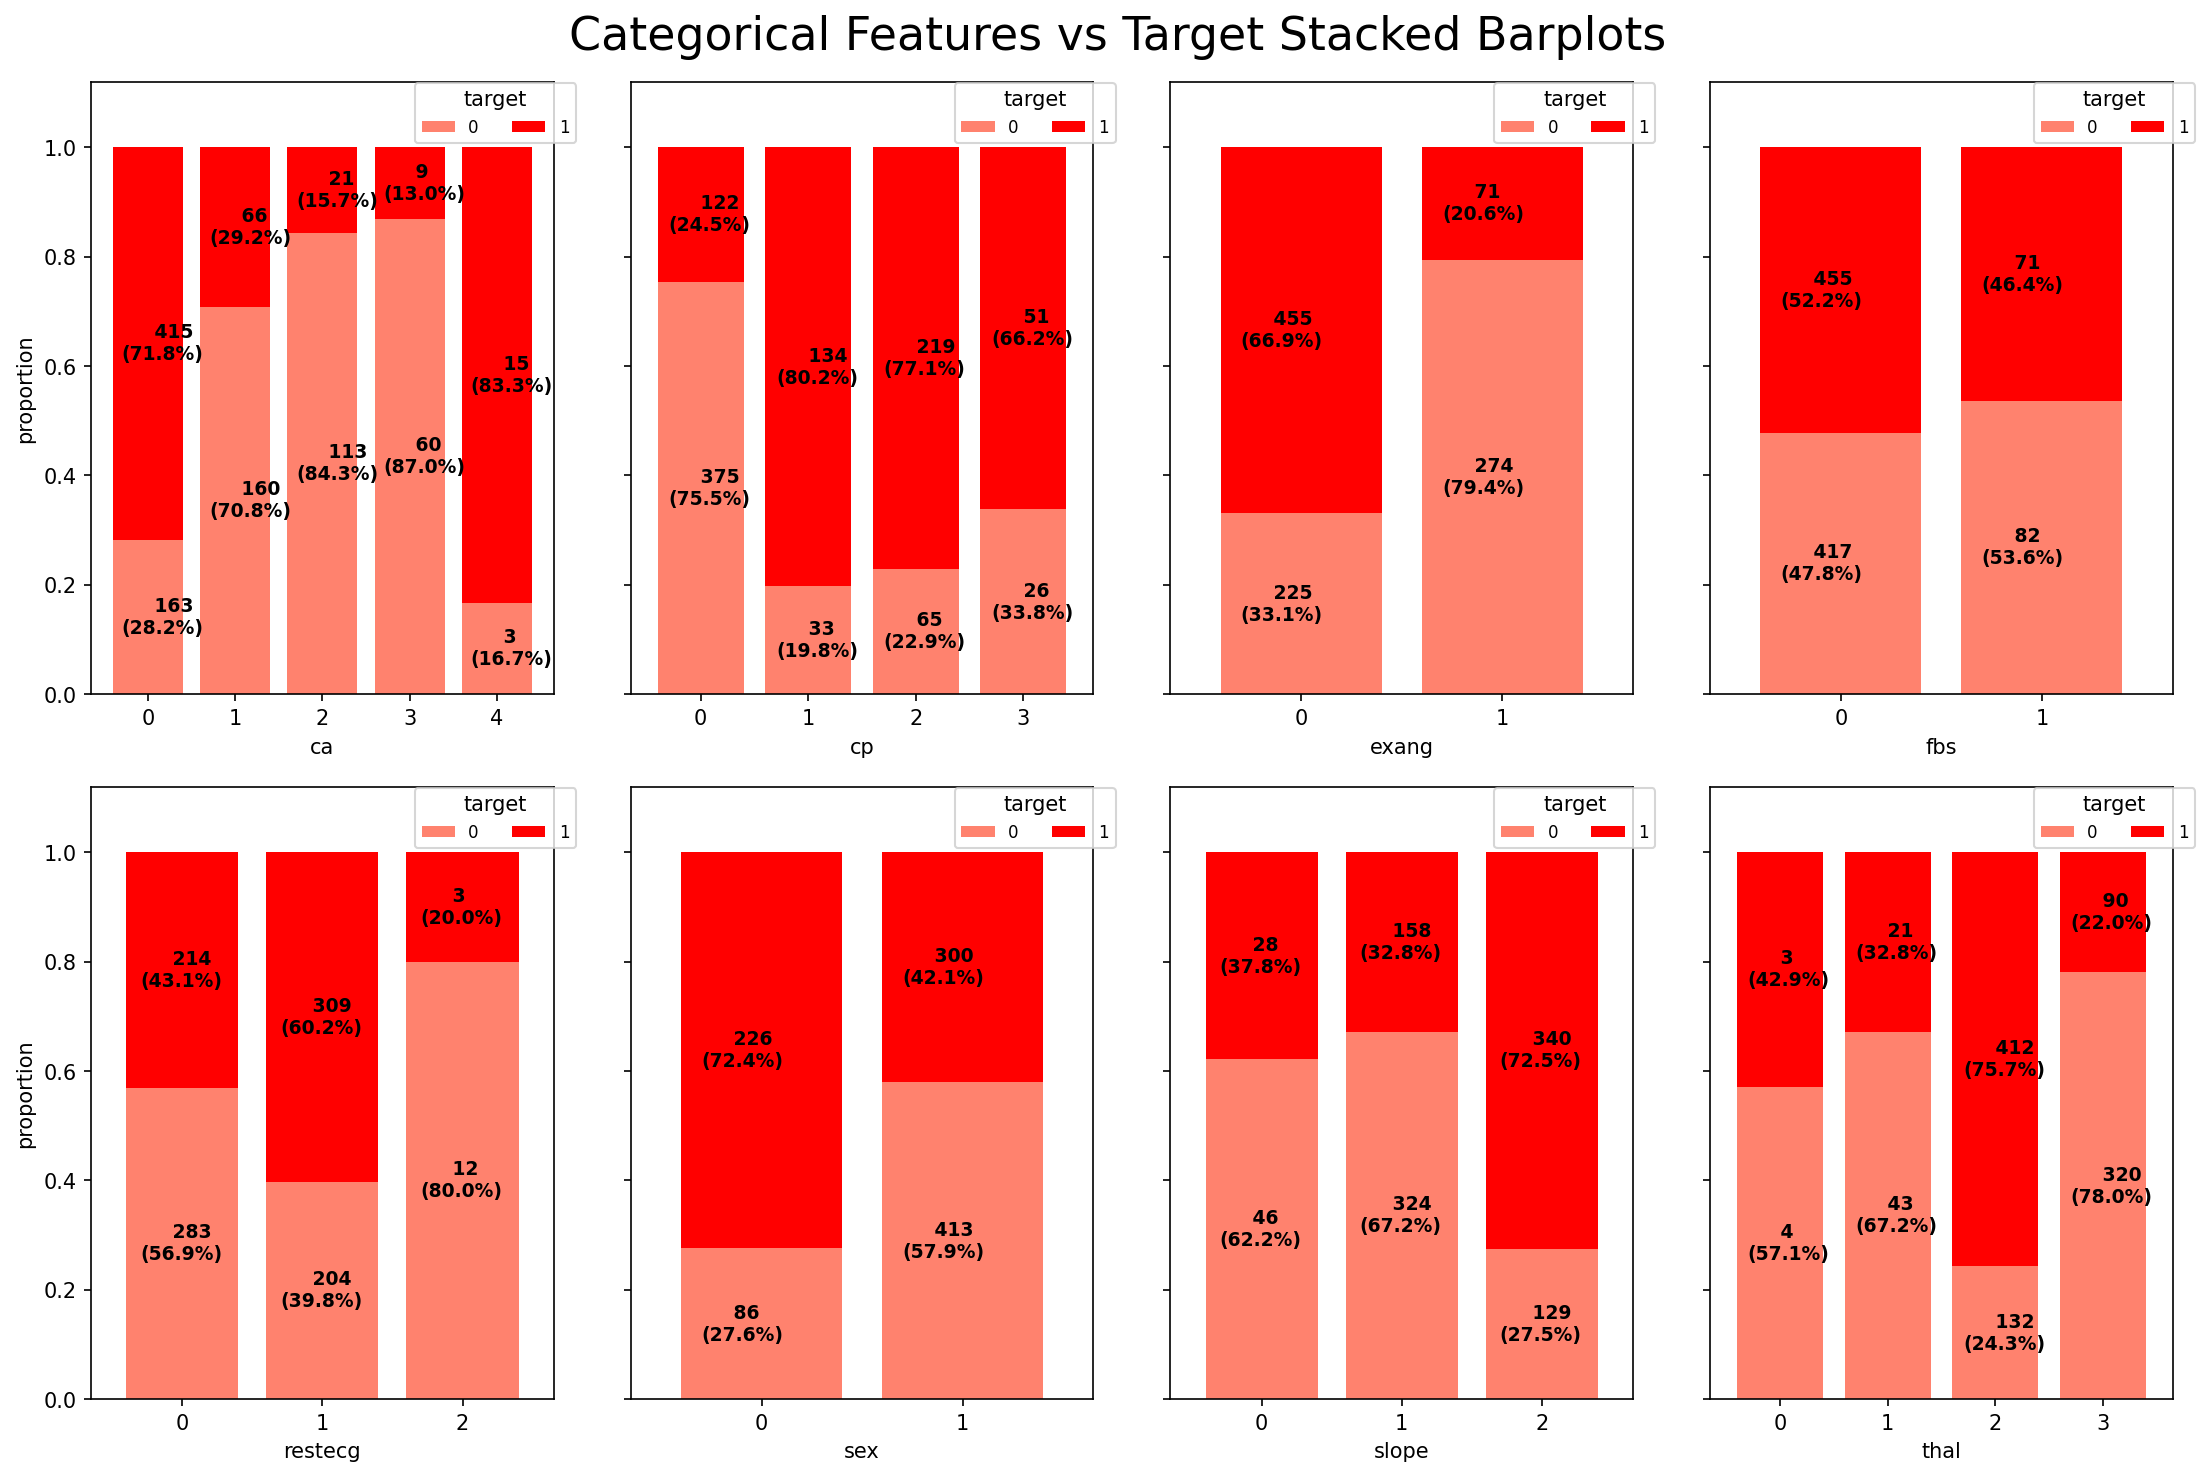

In [40]:
from matplotlib.colors import ListedColormap
categorical_features = [feature for feature in categorical_features if feature != 'target']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i, col in enumerate(categorical_features):
  cross_tab = pd.crosstab(index=df[col], columns=df['target'])
  cross_tab_prob = pd.crosstab(index=df[col], columns=df['target'], normalize='index')
  cmp = ListedColormap(['#ff826e','red'])

  x, y = i//4,i%4
  cross_tab_prob.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp, legend=True, ylabel='proportion', sharey=True)

  for idx, val in enumerate([*cross_tab.index.values]):
    for(proportion, count, y_location) in zip(cross_tab_prob.loc[val], cross_tab.loc[val], cross_tab_prob.loc[val].cumsum()):
      ax[x,y].text(x=idx-0.3, y = (y_location-proportion)+(proportion/2)-0.03, s=f'     {count}\n({np.round(proportion*100,1)}%)', color = "black",  fontsize=9, fontweight="bold")

  ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
  ax[x,y].set_ylim([0,1.12])
  ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

In [41]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
age,0
trestbps,30
chol,16
thalach,4
oldpeak,7


In [42]:
df_encoded = pd.get_dummies(df, columns = ['cp', 'restecg', 'thal'], drop_first= True)

#convert the rest of the categoricl variables that don't need one-hot encodingg to integer data types
feature_to_convert = ['sex', 'fbs', 'exang','slope', 'ca', 'target']
for feature in feature_to_convert:
  df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64
ca,int64


In [43]:
dummy_cols = ['cp_1','cp_2','cp_3','restecg_1','restecg_2','thal_1','thal_2','thal_3']
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype('uint8')

In [44]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,0,0,0,0,1,0,0,1,0


**Transforming Skewed Features**

In [45]:
# Define the features (X) and output labels (Y)
x = df_encoded.drop('target', axis = 1)
y = df_encoded['target']

In [46]:
# Splitting dat a into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

In [47]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [48]:
# Adding a small constant to 'oldpeak' to make all values positive
x_train['oldpeak'] = x_train['oldpeak'] + 0.001
x_test['oldpeak'] = x_test['oldpeak'] + 0.001

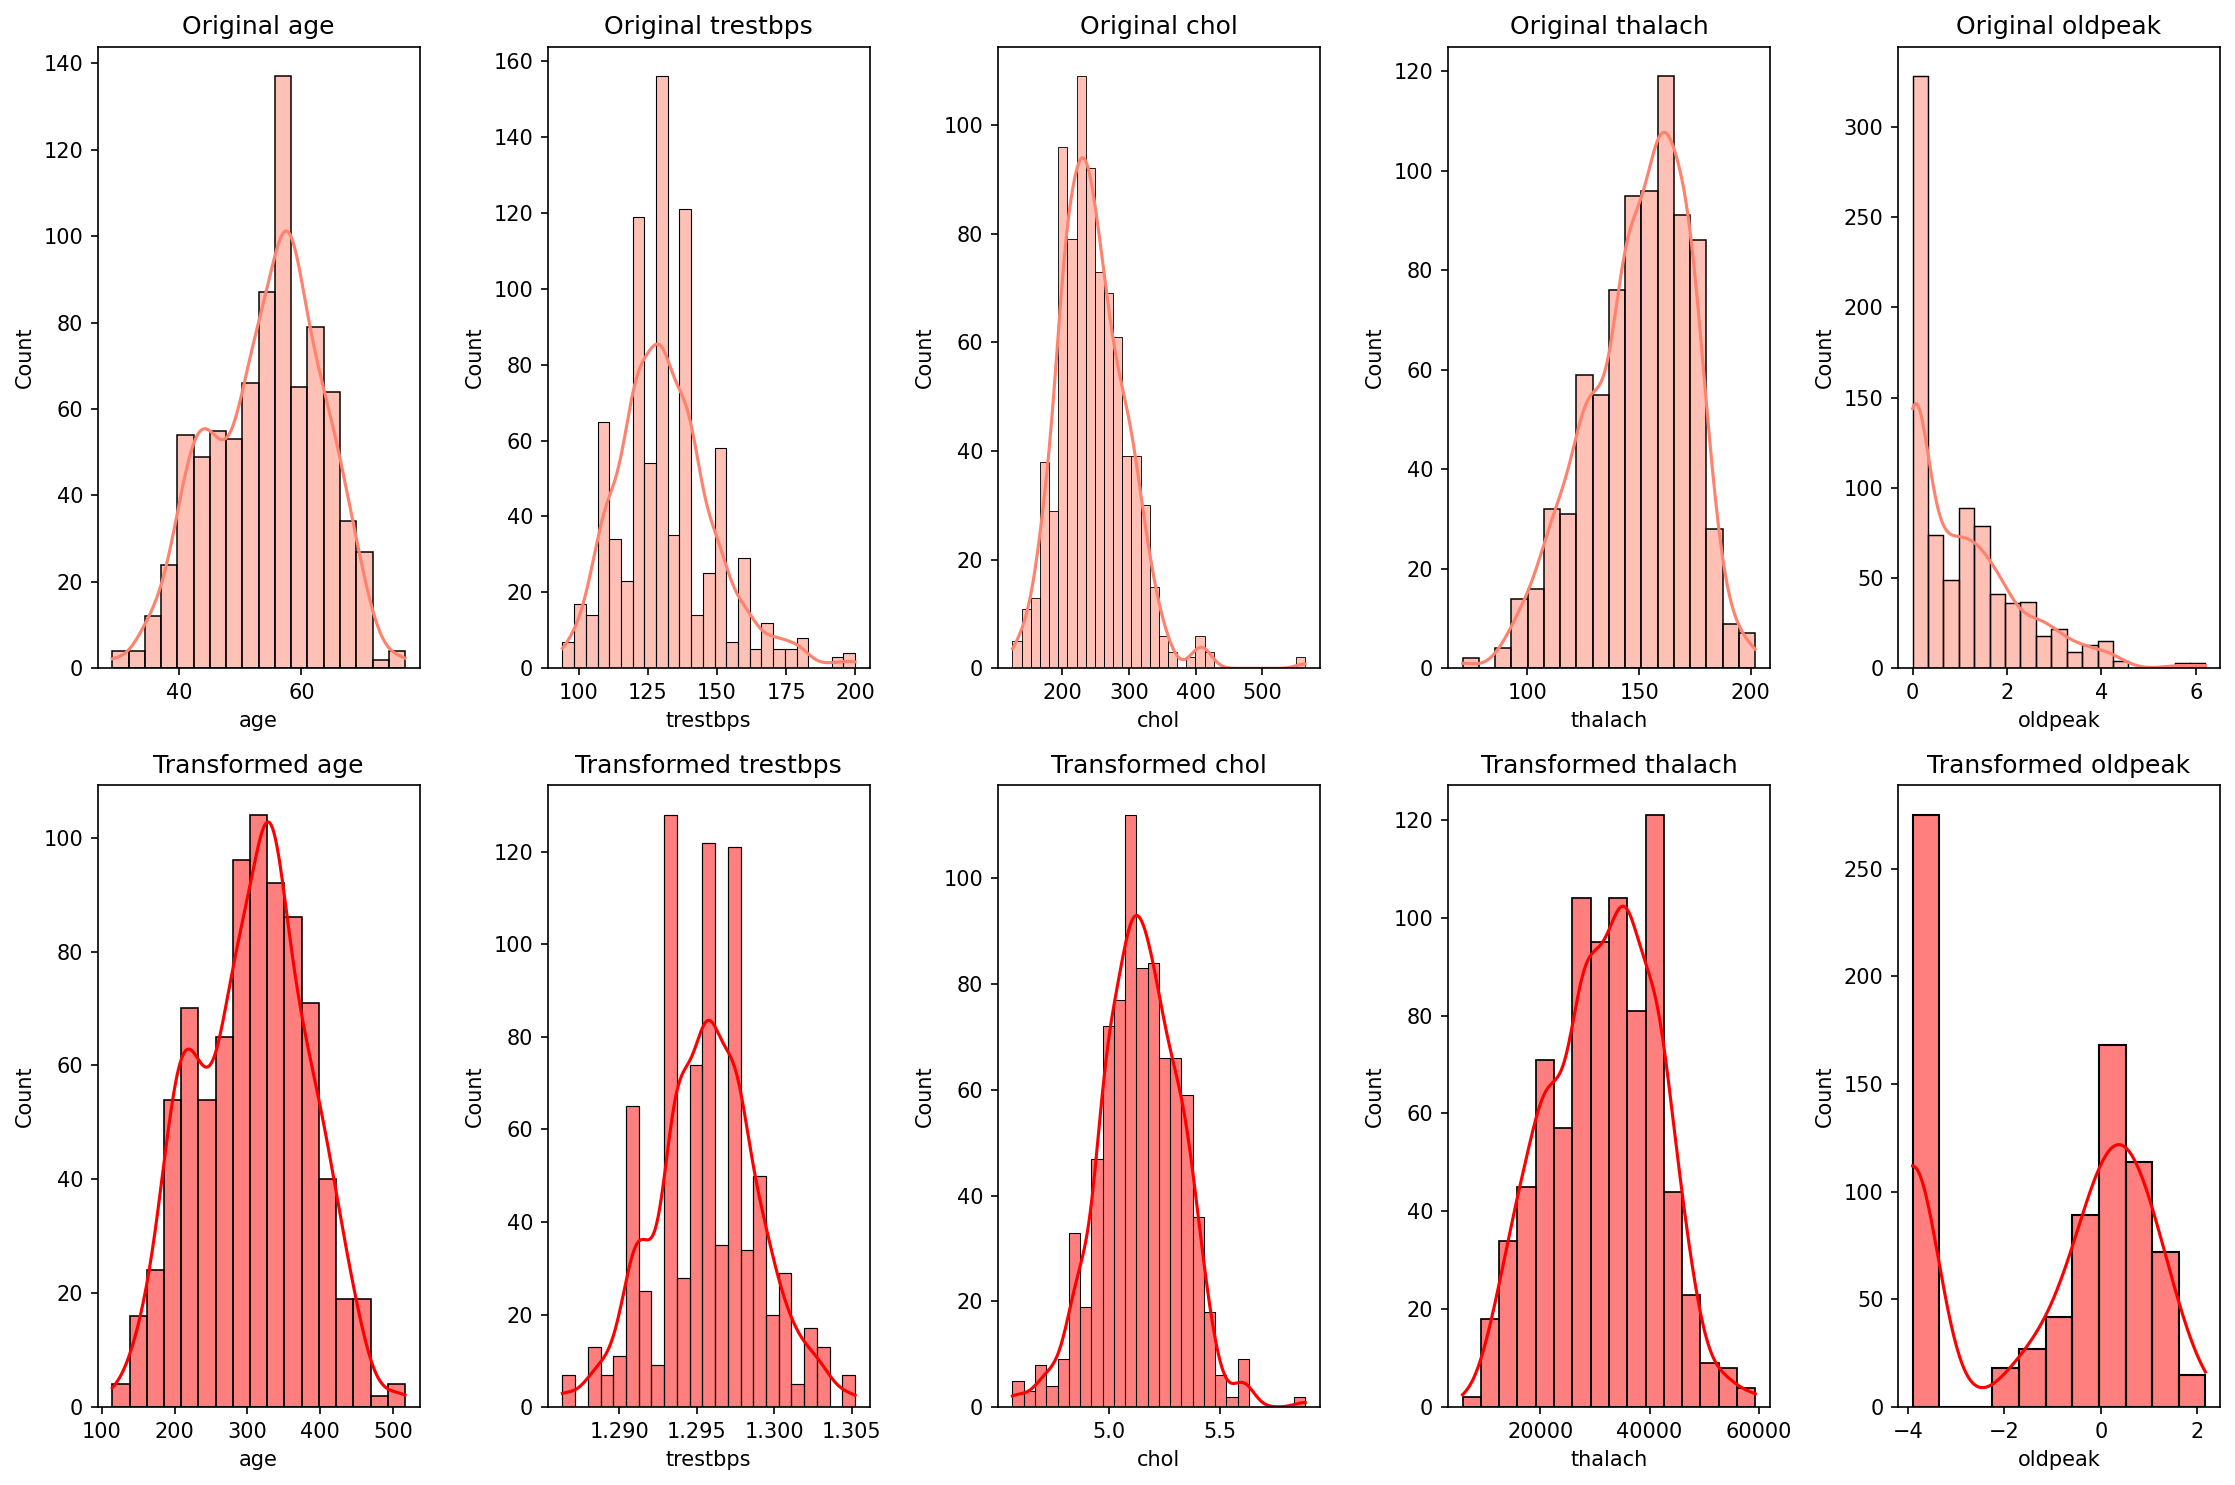

In [49]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize = (15,10))

#Original Distribution
for i, col in enumerate(continuous_features):
  sns.histplot(x_train[col], kde = True, ax=ax[0,i], color = '#ff826e').set_title(f'Original {col}')

#Applying Box-Cox Transformation
from scipy.stats import boxcox # Import boxcox function

#Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
  #ony apply box-cox for positive values
  if x_train[col].min() > 0:
    x_train[col], lambdas[col] = boxcox(x_train[col])
    #Applying same lambda to test data
    x_test[col] = boxcox(x_test[col], lmbda = lambdas[col])
    sns.histplot(x_train[col],kde=True, ax=ax[1,i], color = 'red').set_title(f'Transformed {col}')
  else:
    sns.histplot(x_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

In [50]:
x_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
397,188.243856,1,1.291178,4.818108,0,16654.592901,1,0.739965,1,0,0,0,0,0,0,0,0,1
687,333.780047,1,1.294735,5.333013,0,40983.789741,0,-3.905686,2,2,0,0,0,0,0,0,0,1
909,265.549657,1,1.298293,4.977378,0,20800.169014,1,-0.103254,1,0,0,0,0,0,0,0,0,1
153,298.985470,1,1.293636,5.201127,0,29291.926122,0,-0.840949,1,0,0,1,0,0,0,0,0,1
373,333.780047,1,1.293636,5.285142,0,35357.536287,0,0.621445,1,0,1,0,0,0,0,0,1,0


**Decision Tree Model**

In [51]:
#Define the base DT Model
dt_base = DecisionTreeClassifier(random_state=0)

In [52]:
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold

def tune_clf_hyperparameters(clf, param_grid, x_train, y_train, scoring='recall', n_splits=3):
  #create cross-validation object using StratifiedKFold to ensure class distribution is the same class across all folds
  cv = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=0)
  #Create the GridSearchCV object
  clf_grid = GridSearchCV(clf, param_grid, cv = cv, scoring=scoring, n_jobs=-1)
  #Fit the GridSearchCV obj to training data
  clf_grid.fit(x_train, y_train)
  #Get the best hyperparameters
  best_hyperparameters = clf_grid.best_params_

  return clf_grid.best_estimator_, best_hyperparameters

In [53]:
#Hyperparameter grid DT
param_grid_dt = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,3],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,3]
}

In [54]:
#call function for hyperparametrs tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, x_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [55]:
#Define the base DT Model
dt_base = DecisionTreeClassifier(random_state=0)

In [56]:
#call function for hyperparametrs tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, x_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


**DT Model Evaluation**

In [57]:
print(classification_report(y_train, best_dt.predict(x_train)))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       399
           1       0.84      0.85      0.85       421

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



In [58]:
print(classification_report(y_test, best_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       100
           1       0.87      0.90      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [59]:
def evaluate_model(model, x_test, y_test, model_name):
  """Evaluate performance of a trained model on test data using various metrics."""
  #make prediction
  y_pred = model.predict(x_test)
  report = classification_report(y_test, y_pred, output_dict=True)

  #extracting metrics
  metrics = {
      "precision_0" : report["0"]["precision"],
      "precision_1" : report["1"]["precision"],
      "recall_0" : report["0"]["recall"],
      "recall_1" : report["1"]["recall"],
      "f1_0" : report["0"]["f1-score"],
      "f1_0" : report["1"]["f1-score"],
      "macro_avg_precision" : report["macro avg"]["precision"],
      "macro_avg_recall" : report["macro avg"]["recall"],
      "macro_avg_f1" : report["macro avg"]["f1-score"],
      "accuray" : accuracy_score(y_test, y_pred)
  }

  df = pd.DataFrame(metrics, index=[model_name]).round(2)
  return df

In [60]:
  dt_evaluation = evaluate_model(best_dt, x_test, y_test, 'DT')
  dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuray
DT,0.89,0.87,0.86,0.9,0.88,0.88,0.88,0.88,0.88


**Random Forest Model Building**

In [61]:
rf_base = RandomForestClassifier(random_state=0)

In [62]:
param_grid_rf = {
    'n_estimators' : [10, 30, 50, 70, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,3,4],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,2,3],
    'bootstrap' : [True, False]

}

In [64]:
#Using the tune_clf_hyperparameters function to get the best estimatorr
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, x_train, y_train)
print('RF Optimal Hyperparametes: \n', best_rf_hyperparams)

RF Optimal Hyperparametes: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [65]:
print(classification_report(y_train, best_rf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       399
           1       0.87      0.93      0.90       421

    accuracy                           0.89       820
   macro avg       0.89      0.89      0.89       820
weighted avg       0.89      0.89      0.89       820



In [66]:
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       100
           1       0.85      0.93      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [67]:
rf_evaluation = evaluate_model(best_rf, x_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuray
RF,0.92,0.85,0.83,0.93,0.89,0.89,0.88,0.88,0.88


**KNN Model Building**

In [68]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [69]:
# Define hyperparameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Call function for hyperparameter tuning
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, param_grid_knn, x_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

print(classification_report(y_test, best_knn.predict(x_test)))

KNN Optimal Hyperparameters: 
 {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [70]:
  knn_evaluation = evaluate_model(best_knn, x_test, y_test, 'KNN')
  knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuray
KNN,0.97,1.0,1.0,0.97,0.99,0.99,0.99,0.99,0.99


**SVM Base Model**

In [71]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

In [72]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

In [73]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import boxcox
import pandas as pd
import numpy as np

# Replicate data encoding and splitting steps to ensure x_train and y_train are defined
# (from etBycDewBQM5 and b8GRz0_yBUrE)
df_encoded = pd.get_dummies(df, columns = ['cp', 'restecg', 'thal'], drop_first= True)
feature_to_convert = ['sex', 'fbs', 'exang','slope', 'ca', 'target']
for feature in feature_to_convert:
  df_encoded[feature] = df_encoded[feature].astype(int)
dummy_cols = ['cp_1','cp_2','cp_3','restecg_1','restecg_2','thal_1','thal_2','thal_3']
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype('uint8')

# Define the features (X) and output labels (Y) (from uA_V46qmBeGd)
x = df_encoded.drop('target', axis = 1)
y = df_encoded['target']

# Splitting data into train and test sets (from XZJN4TWoBhG5)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

# Adding a small constant to 'oldpeak' to make all values positive (from 6b4qu2m9BsKO)
x_train['oldpeak'] = x_train['oldpeak'] + 0.001
x_test['oldpeak'] = x_test['oldpeak'] + 0.001

# Applying Box-Cox Transformation (from KuKMtMTpBwUX)
lambdas = {}
continuous_features = ['age','trestbps','chol','thalachh','oldpeak'] # Ensure continuous_features is defined
for i, col in enumerate(continuous_features):
  if col in x_train.columns and x_train[col].min() > 0:
    x_train[col], lambdas[col] = boxcox(x_train[col])
    x_test[col] = boxcox(x_test[col], lmbda = lambdas[col])

# Define the SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Define hyperparameter grid for SVM
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

def tune_clf_hyperparameters(clf, param_grid, x_train, y_train, scoring='recall', n_splits=3):
  cv = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=0)
  clf_grid = GridSearchCV(clf, param_grid, cv = cv, scoring=scoring, n_jobs=-1)
  clf_grid.fit(x_train, y_train)
  best_hyperparameters = clf_grid.best_params_
  return clf_grid.best_estimator_, best_hyperparameters

# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, x_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)


SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [74]:
print(classification_report(y_train, best_svm.predict(x_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.51      1.00      0.68       421

    accuracy                           0.51       820
   macro avg       0.26      0.50      0.34       820
weighted avg       0.26      0.51      0.35       820



In [76]:
print(classification_report(y_test, best_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Modify SVM Tuning Scoring



In [75]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import boxcox
import pandas as pd
import numpy as np

# Replicate data encoding and splitting steps to ensure x_train and y_train are defined
# (from etBycDewBQM5 and b8GRz0_yBUrE)
df_encoded = pd.get_dummies(df, columns = ['cp', 'restecg', 'thal'], drop_first= True)
feature_to_convert = ['sex', 'fbs', 'exang','slope', 'ca', 'target']
for feature in feature_to_convert:
  df_encoded[feature] = df_encoded[feature].astype(int)
dummy_cols = ['cp_1','cp_2','cp_3','restecg_1','restecg_2','thal_1','thal_2','thal_3']
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype('uint8')

# Define the features (X) and output labels (Y) (from uA_V46qmBeGd)
x = df_encoded.drop('target', axis = 1)
y = df_encoded['target']

# Splitting data into train and test sets (from XZJN4TWoBhG5)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

# Adding a small constant to 'oldpeak' to make all values positive (from 6b4qu2m9BsKO)
x_train['oldpeak'] = x_train['oldpeak'] + 0.001
x_test['oldpeak'] = x_test['oldpeak'] + 0.001

# Applying Box-Cox Transformation (from KuKMtMTpBwUX)
lambdas = {}
continuous_features = ['age','trestbps','chol','thalachh','oldpeak'] # Ensure continuous_features is defined
for i, col in enumerate(continuous_features):
  if col in x_train.columns and x_train[col].min() > 0:
    x_train[col], lambdas[col] = boxcox(x_train[col])
    x_test[col] = boxcox(x_test[col], lmbda = lambdas[col])

# Define the SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Define hyperparameter grid for SVM
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

def tune_clf_hyperparameters(clf, param_grid, x_train, y_train, scoring='f1_macro', n_splits=3):
  cv = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=0)
  clf_grid = GridSearchCV(clf, param_grid, cv = cv, scoring=scoring, n_jobs=-1)
  clf_grid.fit(x_train, y_train)
  best_hyperparameters = clf_grid.best_params_
  return clf_grid.best_estimator_, best_hyperparameters

# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, x_train, y_train, scoring='f1_macro')
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)


SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 4, 'svm__gamma': 1, 'svm__kernel': 'poly'}


**Reasoning**:
Now that the SVM model has been retuned with the 'f1_macro' scoring metric, I will evaluate its performance on the training data using a classification report.



In [25]:
print(classification_report(y_train, best_svm.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



**Reasoning**:
Next, I will evaluate the performance of the retuned SVM model on the test data using a classification report.



In [77]:
print(classification_report(y_test, best_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



**Reasoning**:
After evaluating the retuned SVM model on the test data with a classification report, I will now use the `evaluate_model` function to get a summarized DataFrame of its performance metrics. This will consolidate the evaluation results in a structured format for comparison.



In [78]:
svm_evaluation = evaluate_model(best_svm, x_test, y_test, 'SVM_f1_macro')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuray
SVM_f1_macro,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Reasoning**:
The `evaluate_model` function was not defined in the current execution context, leading to a `NameError`. I need to include the definition of the `evaluate_model` function in the current code block before calling it to ensure its availability.



In [79]:
def evaluate_model(model, x_test, y_test, model_name):
  """Evaluate performance of a trained model on test data using various metrics."""
  #make prediction
  y_pred = model.predict(x_test)
  report = classification_report(y_test, y_pred, output_dict=True)

  #extracting metrics
  metrics = {
      "precision_0" : report["0"]["precision"],
      "precision_1" : report["1"]["precision"],
      "recall_0" : report["0"]["recall"],
      "recall_1" : report["1"]["recall"],
      "f1_0" : report["0"]["f1-score"],
      "f1_1" : report["1"]["f1-score"], # Corrected from "f1_0"
      "macro_avg_precision" : report["macro avg"]["precision"],
      "macro_avg_recall" : report["macro avg"]["recall"],
      "macro_avg_f1" : report["macro avg"]["f1-score"],
      "accuray" : accuracy_score(y_test, y_pred)
  }

  df = pd.DataFrame(metrics, index=[model_name]).round(2)
  return df

svm_evaluation = evaluate_model(best_svm, x_test, y_test, 'SVM_f1_macro')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuray
SVM_f1_macro,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
